In [37]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


path = '../final_results/KIRC/MLP_rerun'
model = os.path.split(path)[1]

inner_extended_df = pd.read_csv(path+'/results_inner_extended.csv') 
inner_average_df = pd.read_csv(path+'/results_inner_average_over_folds.csv')
inner_best_df = pd.read_csv(path+'/results_inner_best_over_hyp.csv')
outer_extended_df = pd.read_csv(path+'/results_outer_extended.csv')
outer_average_df = pd.read_csv(path+'/results_outer_average_over_folds.csv')

In [38]:
print(f"Training time: {outer_extended_df['time_total_s'].mean()} ± {outer_extended_df['time_total_s'].std()}")
print(f"Training time: {outer_extended_df['time_total_s'].mean().round()} ± {outer_extended_df['time_total_s'].std().round()}")

Training time: 32.21057567596436 ± 3.8757029204318174
Training time: 32.0 ± 4.0


In [39]:
print(f"Number epochs: {outer_extended_df['number_epochs'].mean()} ± {outer_extended_df['number_epochs'].std()}")
print(f"Number epochs: {outer_extended_df['number_epochs'].mean().round()} ± {outer_extended_df['number_epochs'].std().round()}")

Number epochs: 69.52 ± 40.668013806169284
Number epochs: 70.0 ± 41.0


In [40]:
print(inner_extended_df.shape)
print(outer_extended_df.shape)

(1350, 47)
(50, 47)


In [41]:
outer_extended_df[outer_extended_df['config/train_loop_config/dataset_test_round']==6]['number_epochs']

30    46
31    54
32    52
33    47
34    32
Name: number_epochs, dtype: int64

In [42]:
print('AVERAGE METRICES VALUES OVER THE TEST FOLDS (±STANDARD DEVIATION)')

print(f'Loss: {outer_average_df["average_test_loss"].mean()} ± {outer_average_df["average_test_loss"].std()}')
print(f'Accuracy: {outer_average_df["average_test_accuracy"].mean()} ± {outer_average_df["average_test_accuracy"].std()}')
print(f'AUROC: {outer_average_df["average_test_auroc"].mean()} ± {outer_average_df["average_test_auroc"].std()}')
print(f'AUPRC: {outer_average_df["average_test_auprc"].mean()} ± {outer_average_df["average_test_auprc"].std()}')
print(f'MCC: {outer_average_df["average_test_mcc"].mean()} ± {outer_average_df["average_test_mcc"].std()}')
print(f'F1 Score: {outer_average_df["average_test_f1_score"].mean()} ± {outer_average_df["average_test_f1_score"].std()}')
print(f'Recall: {outer_average_df["average_test_recall"].mean()} ± {outer_average_df["average_test_recall"].std()}')
print(f'Precision: {outer_average_df["average_test_precision"].mean()} ± {outer_average_df["average_test_precision"].std()}')
print(f'Specificity: {outer_average_df["average_test_specificity"].mean()} ± {outer_average_df["average_test_specificity"].std()}') 

AVERAGE METRICES VALUES OVER THE TEST FOLDS (±STANDARD DEVIATION)
Loss: 0.295574537217617 ± 0.041299378120790695
Accuracy: 0.9009803831577301 ± 0.019851427802410657
AUROC: 0.853096774 ± 0.043483999211156116
AUPRC: 0.8424872889999999 ± 0.045107066922265314
MCC: 0.80187907 ± 0.038416450266694366
F1 Score: 0.9248723889999999 ± 0.013929993136980401
Recall: 1.0 ± 0.0
Precision: 0.8605248169999999 ± 0.024065401294937505
Specificity: 0.7475 ± 0.05062114182829146


"\nplt.savefig(path+'/Metrices_violin.png')\nplt.savefig(path+'/Metrices_violin.pdf')\n"

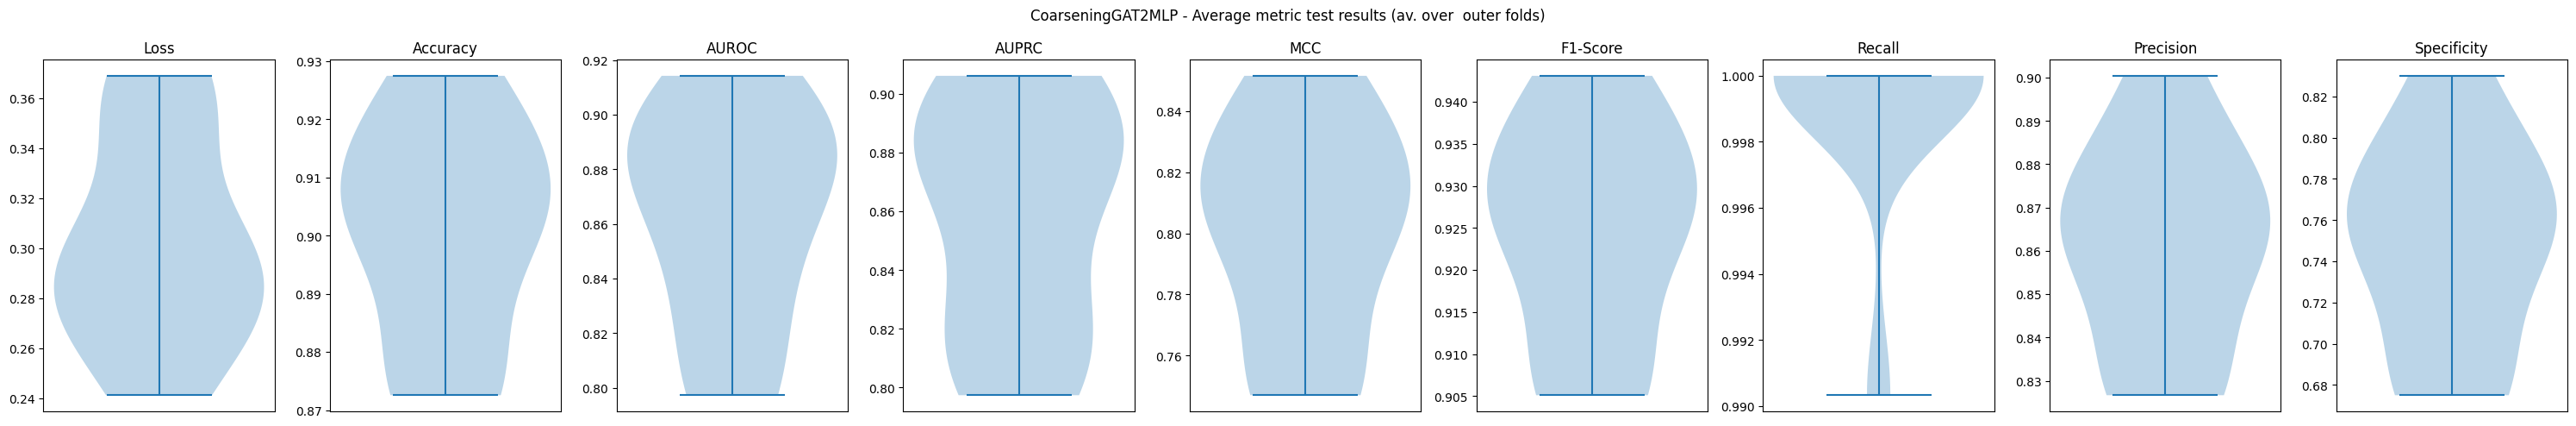

In [32]:
# Plot outer test results (average)
fig, ax = plt.subplots(1,9, figsize=(30,5))

loss = outer_average_df['average_test_loss'].to_list()
acc = outer_average_df['average_test_accuracy'].to_list()
auroc = outer_average_df['average_test_auroc'].to_list()
auprc = outer_average_df['average_test_auprc'].to_list()
mcc = outer_average_df['average_test_mcc'].to_list()
f1 = outer_average_df['average_test_f1_score'].to_list()
recall = outer_average_df['average_test_recall'].to_list()
precision = outer_average_df['average_test_precision'].to_list()
specificity = outer_average_df['average_test_specificity'].to_list()

ax[0].violinplot(loss)
ax[1].violinplot(acc)
ax[2].violinplot(auroc)
ax[3].violinplot(auprc)
ax[4].violinplot(mcc)
ax[5].violinplot(f1)
ax[6].violinplot(recall)
ax[7].violinplot(precision)
ax[8].violinplot(specificity)

# Remove x-axis ticks
for i in range(9):
    ax[i].set_xticks([])

# Set titles
fig.suptitle(model + ' - Average metric test results (av. over  outer folds)')
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[2].set_title('AUROC')
ax[3].set_title('AUPRC')
ax[4].set_title('MCC')
ax[5].set_title('F1-Score')
ax[6].set_title('Recall')
ax[7].set_title('Precision')
ax[8].set_title('Specificity')

plt.tight_layout()

'''
plt.savefig(path+'/Metrices_violin.png')
plt.savefig(path+'/Metrices_violin.pdf')
'''

"\nplt.savefig(path+'/Best_hyperparameter_bar.png')\nplt.savefig(path+'/Best_hyperparameter_bar.pdf')\n"

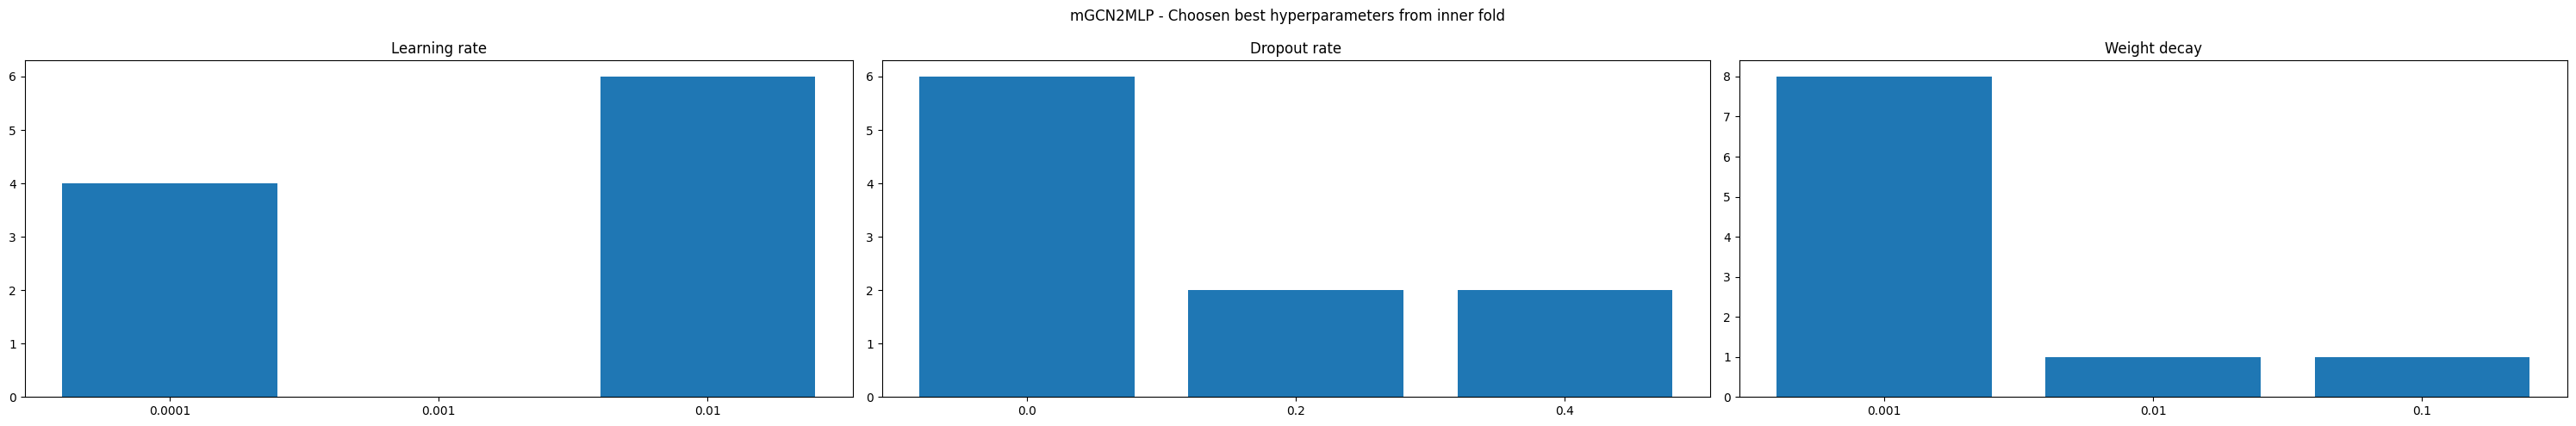

In [8]:
# Best hyperparameters (of inner fold)
fig, ax = plt.subplots(1,3, figsize=(30,5))
fig.suptitle(model+' - Choosen best hyperparameters from inner fold')

lr_options = list(np.sort(inner_extended_df['config/train_loop_config/learning_rate'].unique()))
dp_options = list(np.sort(inner_extended_df['config/train_loop_config/dropout_rate'].unique()))
wd_options = list(np.sort(inner_extended_df['config/train_loop_config/weight_decay'].unique()))

lr = outer_average_df['config/train_loop_config/learning_rate'].to_list()
dp = outer_average_df['config/train_loop_config/dropout_rate'].to_list()
wd = outer_average_df['config/train_loop_config/weight_decay'].to_list()

lr_dict = dict()
dp_dict = dict()
wd_dict = dict()

# Set defaults for dictionary (to also see zero values)
for l in lr_options:
    lr_dict[l] = lr.count(l)
for d in dp_options:
    dp_dict[d] = dp.count(d)
for w in wd_options:
    wd_dict[w] = wd.count(w)


ax[0].bar([0,1,2], list(lr_dict.values()))
ax[1].bar([0,1,2], list(dp_dict.values()))
ax[2].bar([0,1,2], list(wd_dict.values()))

ax[0].set_title('Learning rate')
ax[1].set_title('Dropout rate')
ax[2].set_title('Weight decay')

ax[0].set_xticks([0,1,2], list(lr_dict.keys()))
ax[1].set_xticks([0,1,2], list(dp_dict.keys()))
ax[2].set_xticks([0,1,2], list(wd_dict.keys()))

plt.tight_layout()

'''
plt.savefig(path+'/Best_hyperparameter_bar.png')
plt.savefig(path+'/Best_hyperparameter_bar.pdf')
'''


KeyError: 'config/train_loop_config/dropout_rate_normal'

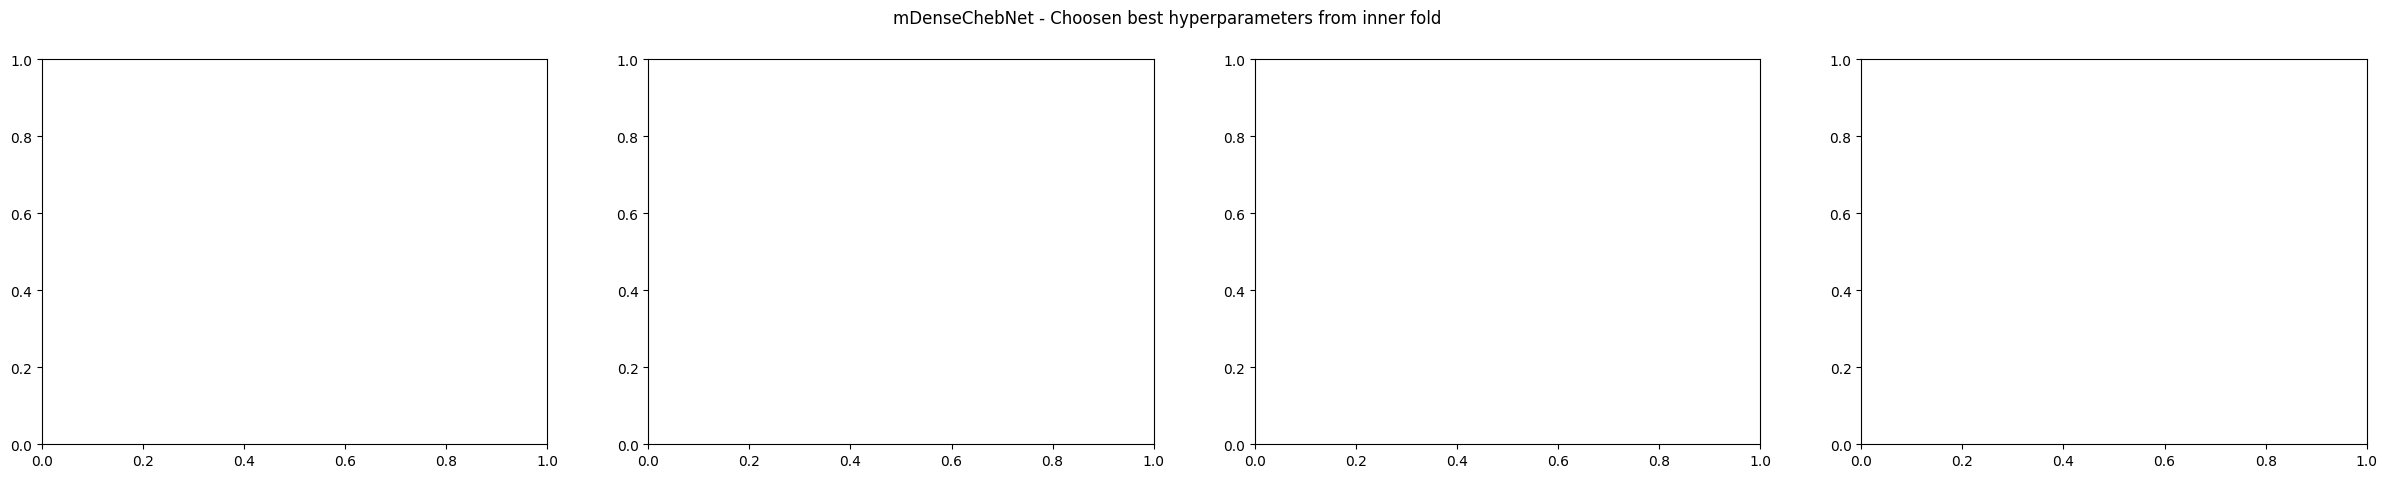

In [17]:
# SAME FOR GAT
# Best hyperparameters (of inner fold)
fig, ax = plt.subplots(1,4, figsize=(30,5))
fig.suptitle(model+' - Choosen best hyperparameters from inner fold')

lr_options = list(np.sort(inner_extended_df['config/train_loop_config/learning_rate'].unique()))
dpn_options = list(np.sort(inner_extended_df['config/train_loop_config/dropout_rate_normal'].unique()))
dpa_options = list(np.sort(inner_extended_df['config/train_loop_config/dropout_rate_attention'].unique()))
wd_options = list(np.sort(inner_extended_df['config/train_loop_config/weight_decay'].unique()))

lr = outer_average_df['config/train_loop_config/learning_rate'].to_list()
dpn = outer_average_df['config/train_loop_config/dropout_rate_normal'].to_list()
dpa = outer_average_df['config/train_loop_config/dropout_rate_attention'].to_list()
wd = outer_average_df['config/train_loop_config/weight_decay'].to_list()

lr_dict = dict()
dpn_dict = dict()
dpa_dict = dict()
wd_dict = dict()

# Set defaults for dictionary (to also see zero values)
for l in lr_options:
    lr_dict[l] = lr.count(l)
for dn in dpn_options:
    dpn_dict[dn] = dpn.count(dn)
for da in dpa_options:
    dpa_dict[da] = dpa.count(da)
for w in wd_options:
    wd_dict[w] = wd.count(w)

ax[0].bar([0,1,2], list(lr_dict.values()))
ax[1].bar([0,1,2], list(dpn_dict.values()))
ax[2].bar([0,1,2], list(dpa_dict.values()))
ax[3].bar([0,1,2], list(wd_dict.values()))

ax[0].set_title('Learning rate')
ax[1].set_title('Dropout rate normal')
ax[2].set_title('Dropout rate attention')
ax[3].set_title('Weight decay')

ax[0].set_xticks([0,1,2], list(lr_dict.keys()))
ax[1].set_xticks([0,1,2], list(dpn_dict.keys()))
ax[2].set_xticks([0,1,2], list(dpa_dict.keys()))
ax[3].set_xticks([0,1,2], list(wd_dict.keys()))

plt.tight_layout()

'''
plt.savefig(path+'/Best_hyperparameter_bar.png')
plt.savefig(path+'/Best_hyperparameter_bar.pdf')
'''

{'bodies': [<matplotlib.collections.PolyCollection at 0x27e512d1ad0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x27e5131f0d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x27e51330a50>,
 'cbars': <matplotlib.collections.LineCollection at 0x27e5123d090>}

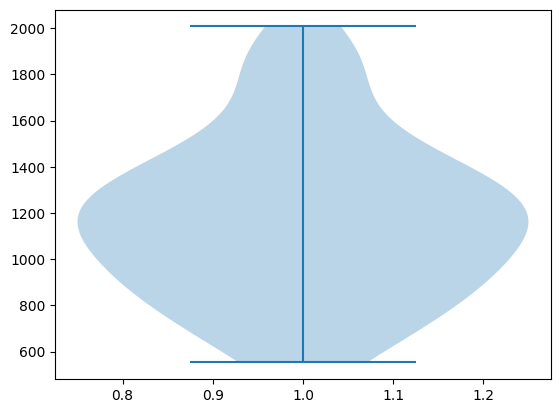

In [ ]:
plt.violinplot(outer_extended_df['time_total_s'])

In [ ]:
print(inner_extended_df.shape)
print(outer_extended_df.shape)

(1350, 47)
(50, 47)
